## VAE training on fasion mnist

### Data exploration

In [1]:
import gzip
import os

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    
    # Define paths to labels and images files
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    # Load labels
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    # Load images
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

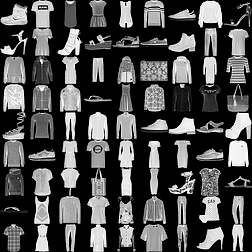

In [3]:
folder = "/".join([os.path.expanduser("~/"), "Workspace/repos/fashion-mnist/data/fashion"])
train_images, train_labels = load_mnist(folder)

first_81_images = np.array(train_images[:81]).reshape(28, 28, -1)
fashion_canvas = first_81_images.reshape(9, 9, 28, 28).transpose(0, 2, 1, 3).reshape(252, 252)
Image.fromarray(fashion_canvas)

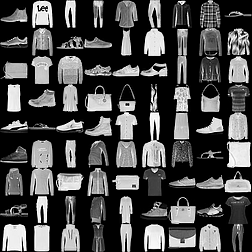

In [4]:
folder = "/".join([os.path.expanduser("~/"), "Workspace/repos/fashion-mnist/data/fashion"])
test_images, test_labels = load_mnist(folder, kind="t10k")

first_81_images = np.array(test_images[:81]).reshape(28, 28, -1)
fashion_canvas = first_81_images.reshape(9, 9, 28, 28).transpose(0, 2, 1, 3).reshape(252, 252)
Image.fromarray(fashion_canvas)

In [5]:
import torch
import sys
sys.path.append("../scripts")
from dataset import transform, test_transform

In [79]:
vae = torch.load("temp.pt")
vae.eval()
print("loaded")

loaded


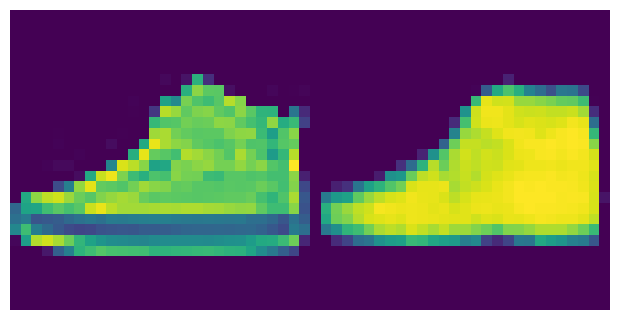

In [91]:
#image = test_images[167].reshape((28, 28))

ori_images = np.zeros((28 * 9, 28 * 9))

restore_images = np.zeros_like(ori_images)

for image in test_images[:81]:
    
    image = image.reshape((28, 28))

    with torch.no_grad():

        oup = vae(test_transform(image).to("mps"))
        
        restore_image = oup[0].reshape((28, 28)).cpu().detach().numpy()
        
        restore_image = (restore_image + 0.5) * 255

    

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 3))

axes[0].imshow(image.reshape((28, 28)))
axes[1].imshow(restore_image)
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0)
plt.show()